## Amazon Alexa Reviews Using Sentiment Analysis

## Abstract : 

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.

We try to predict the ratings given by the customers with the reviews(text data), predicting if the reviews will be able to predict the ratings for the products.

Initially the relationship is observed between each individual column by plotting plots through seaborn and matplotlib.

Data cleansing of review column (text data) is done in order to remove stop words,punctuations and not relevant characters from the text so as to take into account only valuable text data which will help us understand the insights.

After cleaning the data , the text data is tokenized and word2Vec is trained with the review words.

Recurrent Neural Network is used with 1 Dense Layer,and an LSTM layer since our data is sequential(text data).
Embedding Layer is trained with the Word2vec words

The features are reviews data(tokens) and the target data is ratings , 20 epocs are run with the batch size of 1000 for training the RNN.

We run binary cross-entropy and categorical Cross Entropy and we see that the Binary Cross entropy predicts well.

This Notebook is divided into below parts:

1) Data Analysis   
2) Data Cleansing    
3) Word Cloud    
4) Training the Word2Vec with our dictionary words    
4) Data Modelling      
6) Predicting the model  

Import the required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim as ge
stemmer = PorterStemmer()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from gensim.models import word2vec
from keras.initializers import  Constant

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


The csv file contains the reviews of Alexa ,
Upload the file

In [0]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
from google.colab import files
uploaded = files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


In [9]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "amazon_alexa.tsv" with length 514892 bytes


In [0]:
import io
dataset_amazon = pd.read_csv(io.BytesIO(uploaded['amazon_alexa.tsv']),sep='\t')

In [11]:
# dataset_amazon = pd.read_csv('C://Users//nikhi//data//amazon_alexa.tsv',sep='\t')
dataset_amazon['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

The data contains ratings , date on which the customer gave rating,variation(Product Type) , reviews on the product andfeedback for each product

In [0]:
dataset_amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Variation column determines the diffrent types of Alexa purchased 

Lets check the data in each column 

There are 1-5 ratings for the products

In [0]:
dataset_amazon.rating.unique()

array([5, 4, 3, 2, 1])

In [0]:
dataset_amazon.date.unique()

array(['31-Jul-18', '30-Jul-18', '29-Jul-18', '28-Jul-18', '27-Jul-18',
       '26-Jul-18', '25-Jul-18', '24-Jul-18', '23-Jul-18', '22-Jul-18',
       '21-Jul-18', '20-Jul-18', '19-Jul-18', '18-Jul-18', '17-Jul-18',
       '16-Jul-18', '15-Jul-18', '14-Jul-18', '13-Jul-18', '12-Jul-18',
       '11-Jul-18', '10-Jul-18', '9-Jul-18', '8-Jul-18', '7-Jul-18',
       '6-Jul-18', '5-Jul-18', '4-Jul-18', '3-Jul-18', '2-Jul-18',
       '1-Jul-18', '30-Jun-18', '29-Jun-18', '28-Jun-18', '27-Jun-18',
       '26-Jun-18', '25-Jun-18', '24-Jun-18', '23-Jun-18', '22-Jun-18',
       '21-Jun-18', '20-Jun-18', '19-Jun-18', '18-Jun-18', '17-Jun-18',
       '16-Jun-18', '15-Jun-18', '14-Jun-18', '13-Jun-18', '12-Jun-18',
       '11-Jun-18', '10-Jun-18', '9-Jun-18', '8-Jun-18', '7-Jun-18',
       '6-Jun-18', '5-Jun-18', '4-Jun-18', '3-Jun-18', '2-Jun-18',
       '1-Jun-18', '31-May-18', '30-May-18', '29-May-18', '28-May-18',
       '27-May-18', '26-May-18', '25-May-18', '24-May-18', '23-May-18',
       '22

Below dispalys the list of all the products for which the customer has given review and ratings

In [0]:
dataset_amazon.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

Feedback ranges from 0 & 1 as shown below

In [0]:
dataset_amazon.feedback.unique()

array([1, 0])

## Part 1 : Data Analysis

Lets check the most purchased Amazon product

In [0]:
dataset_amazon['variation'] = dataset_amazon['variation'].str.strip()

By plotting the below graph , it is clear that the Black Dot was the most purchased Alexa

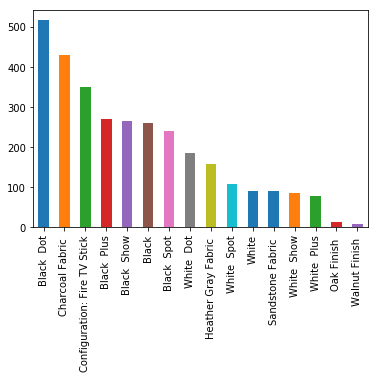

In [0]:
dataset_amazon['variation'].value_counts().plot(kind='bar')

Plotting the number of ratings given by user ( Our rating range is from 1-5)
5 being the maximum rating.    
From the below graph it can be seen that many Alexa products have recieved 5 rating

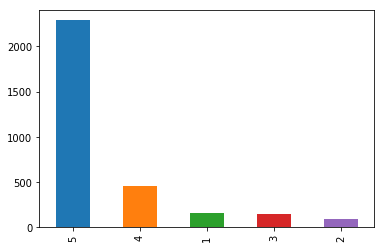

In [0]:
dataset_amazon['rating'].value_counts().plot(kind = 'bar')

Lets check each variation with respect to ratings.  
It will determine the number of rating given to each variation

In [0]:
dataset_amazon_variation_rating = dataset_amazon.groupby(['variation','rating'])['rating'].count()
dataset_amazon_variation_rating.head(10)

variation   rating
Black       1          30
            2           5
            3          15
            4          35
            5         176
Black  Dot  1          22
            2          14
            3          34
            4          84
            5         362
Name: rating, dtype: int64

It can be seen that the maxim rating for each Varition(product) is 5 

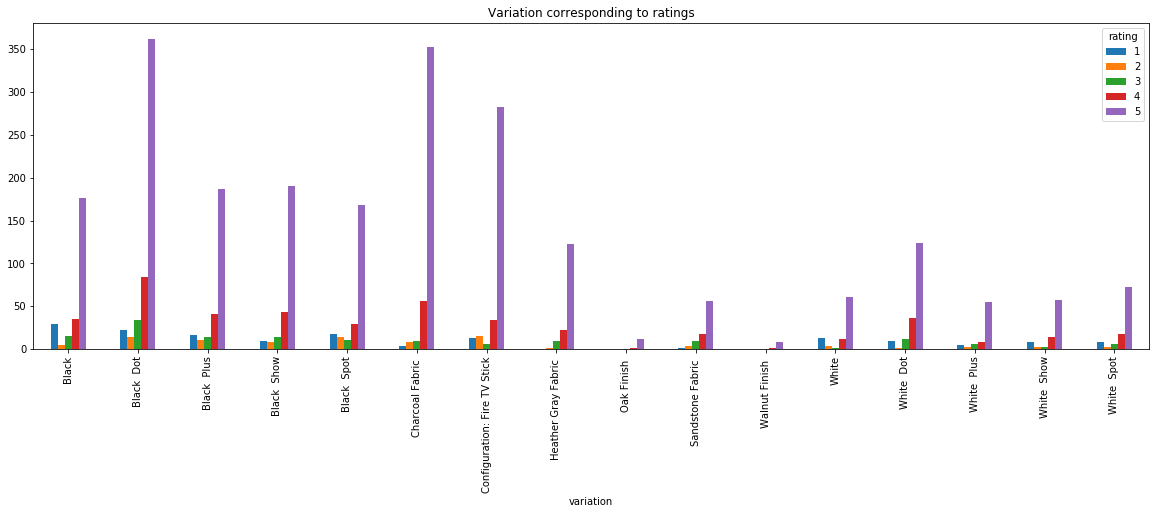

In [0]:
dataset_amazon_variation_rating.unstack().plot(kind='bar',stacked=False , title='Variation corresponding to ratings',figsize=(20, 6))

Now lets check the Feedback column and plot the percent of +ve and -ve feedback

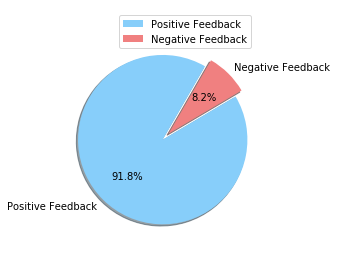

In [0]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(3,4))
ax1.pie(dataset_amazon['feedback'].value_counts(), explode=explode,labels=['Positive Feedback','Negative Feedback'], autopct='%1.1f%%',colors = ['lightskyblue','lightcoral'],
        shadow=True, startangle=60)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

It can be observed that the feedback = 1 corresponds to 3,4,5 ratings and Feedback = 0 corresponds to 0 & 1 ratings

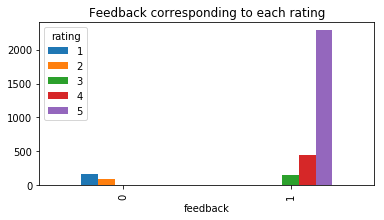

In [0]:
dataset_amazon_feedback_rating =dataset_amazon.groupby(['feedback','rating'])['rating'].count()
dataset_amazon_feedback_rating.unstack().plot(kind='bar',stacked=False , figsize = (6,3),title = 'Feedback corresponding to each rating')

In [0]:
dataset_amazon_review_rating = dataset_amazon.groupby(['verified_reviews'])['rating'].count()

## Part 2: Data Cleanising 

Lets now see , what kind of review gets a 5 rating .
We will start by doing Sentiment Analysis on the column verified_reviews

Covert all the text to lower case

In [12]:
dataset_amazon['verified_reviews'].apply(lambda x : x.lower()).head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: verified_reviews, dtype: object

Apply regex to remove punctuations

In [0]:
dataset_amazon['verified_reviews'] = dataset_amazon['verified_reviews'].apply(lambda x : re.sub('[^a-zA-z0-9\s]','',x))

In [0]:
dataset_amazon['verified_reviews'] =  dataset_amazon['verified_reviews']  = dataset_amazon['verified_reviews'] .apply(lambda x: x.lstrip(' '))
# dataset_amazon['verified_reviews']

Remove Stopwords

In [15]:
stop = stopwords.words('english')
dataset_amazon['verified_reviews'] = dataset_amazon['verified_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataset_amazon['verified_reviews'].head()

0                                            Love Echo
1                                                Loved
2    Sometimes playing game answer question correct...
3    I lot fun thing My 4 yr old learns dinosaurs c...
4                                                Music
Name: verified_reviews, dtype: object

Stem the text data :   
    Reduce the stem from the words  
    eg : Continued , continution will be considered same since porter will reduce the word to its stem

In [0]:
stem = PorterStemmer()
dataset_amazon['verified_reviews'] = dataset_amazon['verified_reviews'].apply(lambda x :" ".join([stem.stem(word) for word in x.split()]))

apply regex to text data to remove punctionations , symols , numbers

In [0]:
dataset_amazon['verified_reviews']  = dataset_amazon['verified_reviews'].apply(lambda x:  re.sub(r'https?:\/\/.*\/\w*', '', x))
dataset_amazon['verified_reviews']  = dataset_amazon['verified_reviews'].apply(lambda x :re.sub('[^a-zA-z0-9\s]','' ,x))
dataset_amazon['verified_reviews']   = dataset_amazon['verified_reviews'].apply(lambda x: re.sub('@[^\s]+','',x))
dataset_amazon['verified_reviews']   = dataset_amazon['verified_reviews'].apply(lambda x:  re.sub(r'\$\w*,', '', x))
dataset_amazon['verified_reviews']   = dataset_amazon['verified_reviews'].apply(lambda x: re.sub(r'#\w*', '', x))
dataset_amazon['verified_reviews']  = dataset_amazon['verified_reviews'].apply(lambda x: re.sub(r'\s\s+', ' ', x))
dataset_amazon['verified_reviews']   = dataset_amazon['verified_reviews'].apply(lambda x: x.lstrip(' '))

In [18]:
dataset_amazon['verified_reviews'].values.tolist()[1:10]

['love',
 'sometim play game answer question correctli alexa say got wrong answer I like abl turn light away home',
 'I lot fun thing My 4 yr old learn dinosaur control light play game like categori ha nice sound play music well',
 'music',
 'I receiv echo gift I need anoth bluetooth someth play music easili access found smart speaker cant wait see els',
 'without cellphon I cannot use mani featur I ipad see use It IS great alarm If u r almost deaf hear alarm bedroom live room reason enough keep herit fun ask random question hear respons she seem smartbon polit yet',
 'I think 5th one ive purchas Im work get one everi room hous I realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love ive listen song I havent heard sinc childhood I get news weather inform it great']

## Part 3 : Word Clouds

Generate a postive word cloud ,  by checking the rating and Reviews 

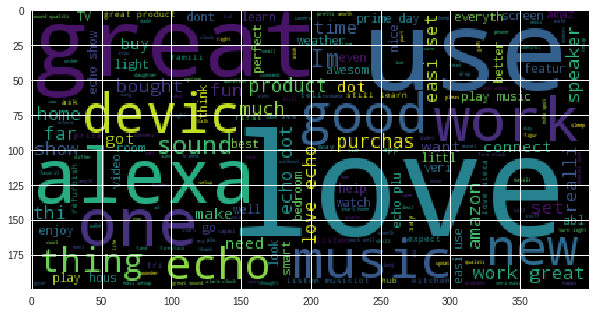

In [184]:
positive=dataset_amazon[dataset_amazon.rating==5].verified_reviews.unique().tolist()
positive=" ".join(positive)
from wordcloud import WordCloud
cv=WordCloud().generate(positive)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

Negative Word CLoud

Generate a negative word cloud ,  by checking the rating and Reviews 

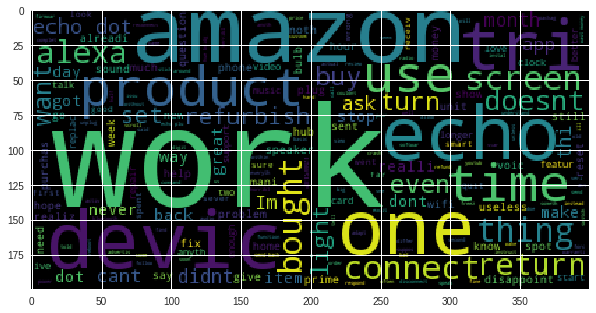

In [185]:
negative=dataset_amazon[dataset_amazon.rating==1].verified_reviews.unique().tolist()
negative=" ".join(negative)
from wordcloud import WordCloud
cv=WordCloud().generate(negative)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

We can also check the most frequently used words when the Variation is Charcol fabric & Black Dot 
because these are the variations which have recieved maximum 5 ratings

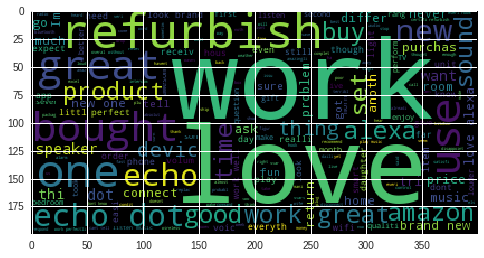

In [186]:
from wordcloud import WordCloud
Variation_rating_cloud = dataset_amazon[dataset_amazon['variation']=='Black'].verified_reviews.unique().tolist()
Variation_rating_cloud


Variation_rating_cloud=" ".join(Variation_rating_cloud)
cloud = WordCloud().generate(Variation_rating_cloud)
cloud
plt.imshow(cloud)

## Part 4 : Tokenization for Training the Word2Vec and FastText models from Gensim 


Now lets Tokenize the sentences and do word Embedding where the Embedding Layer will be trained by the words 

In [37]:
list_text = dataset_amazon['verified_reviews'].values.tolist()
len(list_text)
list_text[1:10]

['love',
 'sometim play game answer question correctli alexa say got wrong answer I like abl turn light away home',
 'I lot fun thing My 4 yr old learn dinosaur control light play game like categori ha nice sound play music well',
 'music',
 'I receiv echo gift I need anoth bluetooth someth play music easili access found smart speaker cant wait see els',
 'without cellphon I cannot use mani featur I ipad see use It IS great alarm If u r almost deaf hear alarm bedroom live room reason enough keep herit fun ask random question hear respons she seem smartbon polit yet',
 'I think 5th one ive purchas Im work get one everi room hous I realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love ive listen song I havent heard sinc childhood I get news weather inform it great']

Tokenize the text into words

In [20]:
review_words = list()
for text in list_text:
    tokens = word_tokenize(text)
    review_words.append(tokens)
len(review_words)


3150

In [24]:
token = Tokenizer()
token.fit_on_texts(review_words)
seq = token.texts_to_sequences(review_words)
pad = pad_sequences(seq , maxlen = 128)
word_idx = token.word_index
features = pad
# len(word_idx)
features

array([[  0,   0,   0, ...,   0,   2,   3],
       [  0,   0,   0, ...,   0,   0,   2],
       [  0,   0,   0, ...,  36, 281,  27],
       ...,
       [  0,   0,   0, ...,  16,  34, 249],
       [  0,   0,   0, ..., 287, 678,  20],
       [  0,   0,   0, ...,   0,   0,  22]], dtype=int32)

We train Word2vec & FastText with our Dictionary words  

Word2Vec is a semantic learning framework that uses a shallow neural network to 
learn the representations of words/phrases in a particular text.
It captures the relationship between words and give them similar probabilities       


FastText is an extension to Word2Vec proposed by Facebook in 2016. Instead of feeding individual words into the Neural Network, FastText breaks words into several n-grams (sub-words).          
Reference: https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c

Create the embedding matrix for Word2Vec and Fatstext

In [0]:
def form_word_matrix(file,learn_models):
    filename = file
    # filename = 'word2vec.txt'
          learn_models.wv.save_word2vec_format(filename , binary=False)


    embedding_ind= {}
    f = open(os.path.join('',filename),encoding="utf-8")
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:])
        embedding_ind[word] = coefs

    f.close()


    num_words = len(word_idx) + 1
    embedd_matrix = np.zeros((num_words , embed_dim))

    for word , i in word_idx.items():

        if i > num_words:
            continue
        embedding_vector = embedding_ind.get(word)
        if embedding_vector is not None:
            embedd_matrix[i] = embedding_vector 
        return embedd_matrix

 **Word2Vec**

In [35]:
import os
embed_dim = 200
word2vec_learn_model = ge.models.Word2Vec(sentences=review_words, 
                                 size=embed_dim , 
                                 window=5 , 
                                 workers = 4, 
                                 min_count = 1)

word2_words = list(word2vec_learn_model.wv.vocab)
print(word2_words)
word2ve_emb_matrix = form_word_matrix('word2vec.txt',word2vec_learn_model)
print(word2ve_emb_matrix)
word2vec_learn_model.wv

['love', 'echo', 'sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'got', 'wrong', 'I', 'like', 'abl', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', 'My', '4', 'yr', 'old', 'learn', 'dinosaur', 'control', 'categori', 'ha', 'nice', 'sound', 'music', 'well', 'receiv', 'gift', 'need', 'anoth', 'bluetooth', 'someth', 'easili', 'access', 'found', 'smart', 'speaker', 'cant', 'wait', 'see', 'els', 'without', 'cellphon', 'can', 'not', 'use', 'mani', 'featur', 'ipad', 'It', 'IS', 'great', 'alarm', 'If', 'u', 'r', 'almost', 'deaf', 'hear', 'bedroom', 'live', 'room', 'reason', 'enough', 'keep', 'herit', 'ask', 'random', 'respons', 'she', 'seem', 'smartbon', 'polit', 'yet', 'think', '5th', 'one', 'ive', 'purchas', 'Im', 'work', 'get', 'everi', 'hous', 'realli', 'offer', 'specifili', 'throughout', 'look', 'listen', 'song', 'havent', 'heard', 'sinc', 'childhood', 'news', 'weather', 'inform', 'it', 'sent', '85', 'year', 'dad', 'talk', 'constantli', 'knew', 'eveyd

**FastText**

In [38]:
embed_dim1 = 200
FastText_model1 = ge.models.FastText(sentences=review_words, 
                                 size=embed_dim1 , 
                                 window=5 , 
                                 workers = 4, 
                                 min_count = 1)

fast_words = list(FastText_model1.wv.vocab)
print(fast_words)
fast_emb_matrix = form_word_matrix('FastText.txt',FastText_model1)
print(FastText_model1)


['love', 'echo', 'sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'got', 'wrong', 'I', 'like', 'abl', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', 'My', '4', 'yr', 'old', 'learn', 'dinosaur', 'control', 'categori', 'ha', 'nice', 'sound', 'music', 'well', 'receiv', 'gift', 'need', 'anoth', 'bluetooth', 'someth', 'easili', 'access', 'found', 'smart', 'speaker', 'cant', 'wait', 'see', 'els', 'without', 'cellphon', 'can', 'not', 'use', 'mani', 'featur', 'ipad', 'It', 'IS', 'great', 'alarm', 'If', 'u', 'r', 'almost', 'deaf', 'hear', 'bedroom', 'live', 'room', 'reason', 'enough', 'keep', 'herit', 'ask', 'random', 'respons', 'she', 'seem', 'smartbon', 'polit', 'yet', 'think', '5th', 'one', 'ive', 'purchas', 'Im', 'work', 'get', 'everi', 'hous', 'realli', 'offer', 'specifili', 'throughout', 'look', 'listen', 'song', 'havent', 'heard', 'sinc', 'childhood', 'news', 'weather', 'inform', 'it', 'sent', '85', 'year', 'dad', 'talk', 'constantli', 'knew', 'eveyd

The models now has the  having similar context words placed to each other.

Check the trained model  
The model will output the words relevant toinput , it captures the context of relevant words

The advantage of using Fast Text is that it uses n-grams technique to train itself and so even if we enter the word which doesnt exists in the dictionary it will still give us the results , however word2vec will throw error

In [28]:
word2vec_learn_model.wv.similar_by_word('love')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bought', 0.9999526739120483),
 ('go', 0.999950647354126),
 ('purchas', 0.9999494552612305),
 ('show', 0.9999491572380066),
 ('use', 0.9999487400054932),
 ('hous', 0.9999485015869141),
 ('think', 0.999948263168335),
 ('one', 0.9999477863311768),
 ('got', 0.9999477863311768),
 ('also', 0.9999472498893738)]

Gastroenteritis is not present in the dictionary and FasTtext came up with some output

In [39]:
import os
FastText_model1.wv.most_similar("Gastroenteritis")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('typic', 0.9992585778236389),
 ('crappi', 0.9992550611495972),
 ('mere', 0.9992520213127136),
 ('feedback', 0.9992483854293823),
 ('grace', 0.9992479085922241),
 ('shoot', 0.9992465376853943),
 ('squarerectangular', 0.9992458820343018),
 ('bezo', 0.9992431402206421),
 ('situat', 0.9992426633834839),
 ('not', 0.9992426633834839)]

Word2vec threw an error

In [0]:
##word2vec_learn_model.wv.similar_by_word('Gastroenteritis')

##----Error

## Part 5: Train the model with our own embeded trained words

Tokenizer isused  to form tokens of words from review data, the data is converted to sequences since we can only feed numerical values to ML algorithms
we do pad_sequence for same formatting sequences to the same length.

The Rating columns is coverted to dummy variables , since we cant feed the network with integer(1,2,3,4,5)
The data is then split into test and train

In [0]:
    Y = pd.get_dummies(dataset_amazon['rating']).values
    feature_train, feature_test, label_train, label_test = train_test_split(features,Y, test_size = 0.23, random_state = 42)

**Function defined for creating , fitting and testing the model for Word2vec &
FastText through Binary and Categorical Cross Entropy**

In [0]:
def predict_acc_model(model_tmp):
    batch_size = 1000
    pred = model_tmp.predict(feature_test)

    score,acc = model_tmp.evaluate(feature_test, label_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))
    return score , acc

In [0]:
def fit_model(model_tmp):

# The model is fit by running 20 epocs with a batch size of 1000,
  batch_size = 1000
  return model_tmp.fit(feature_train, label_train, epochs = 50, batch_size=batch_size, verbose = 2)
  

The model is trained having below layers:
embedding layer having sequence of words
LSTM
Dense Layer having 5 neurons at the output since we have 5 ratings to be predicted depending on our words (embedding layer)
Loss is calculated using Categorical crossentropy as seen below:

In [0]:
def crossentropy(embedding_matrix_tmp,loss_tmp) : 

    lstm_out =196
    batch_size = 1000
    num_words = len(word_idx) + 1


    ### here the Sequently model is formed by adding the layers 
    imput_length1 = features.shape[1]
    model_new = Sequential()
    embedding_layer2 = Embedding(num_words,
                       embed_dim,
                       embeddings_initializer = Constant(embedding_matrix_tmp),
                        input_length = imput_length1)
    model_new.add(embedding_layer2)
    model_new.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model_new.add(Dense(5,activation='softmax'))
    model_new.compile(loss = loss_tmp, optimizer='adam',metrics = ['accuracy'])
  
    return (model_new.summary() ,fit_model(model_new),
           predict_acc_model(model_new))
  

Check the Categorical Croosentropy , Binary Cross Entropy with Word2vec and FastText data


**1) Categorical Cross entropy with Word2vec**

Check the score and accuracy of Categorical Cross Entropy

In [66]:
bin_model_fast = crossentropy(fast_emb_matrix,'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 128, 200)          677200    
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               311248    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 985       
Total params: 989,433
Trainable params: 989,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 - 3s - loss: 0.4980 - acc: 0.8000
Epoch 2/50
 - 2s - loss: 0.4778 - acc: 0.8000
Epoch 3/50
 - 2s - loss: 0.3823 - acc: 0.8241
Epoch 4/50
 - 2s - loss: 0.3153 - acc: 0.8910
Epoch 5/50
 - 2s - loss: 0.3046 - acc: 0.8960
Epoch 6/50
 - 2s - loss: 0.2905 - acc: 0.8922
Epoch 7/50
 - 2s - loss: 0.2850 - acc: 0.8918
Epoch 8/50
 - 2s - loss: 0.2738 - acc: 0.8967
Epoch 9/50
 - 2s - loss: 0.2643 

In [67]:
bin_model_word2 = crossentropy(word2ve_emb_matrix,'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 128, 200)          677200    
_________________________________________________________________
lstm_5 (LSTM)                (None, 196)               311248    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 985       
Total params: 989,433
Trainable params: 989,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 - 3s - loss: 0.4981 - acc: 0.8000
Epoch 2/50
 - 2s - loss: 0.4800 - acc: 0.8000
Epoch 3/50
 - 2s - loss: 0.3953 - acc: 0.8144
Epoch 4/50
 - 2s - loss: 0.3240 - acc: 0.8915
Epoch 5/50
 - 2s - loss: 0.3075 - acc: 0.8974
Epoch 6/50
 - 2s - loss: 0.2879 - acc: 0.8930
Epoch 7/50
 - 2s - loss: 0.2816 - acc: 0.8926
Epoch 8/50
 - 2s - loss: 0.2700 - acc: 0.9017
Epoch 9/50
 - 2s - loss: 0.2617 

## Part 6 :**Train the model without embeded trained words and just pass the word vectors to the embedding layer**

Lets train the model without any words and check if the accuracy is improving or decreasing:

We will remove the embedding layer from the network

In [81]:
embedding_size=32
vocabulary_size = 100

model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length= features.shape[1]))
model.add(LSTM(100))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 128, 32)           3200      
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 505       
Total params: 56,905
Trainable params: 56,905
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
model.fit(feature_train, label_train, epochs = 50, batch_size=batch_size, verbose = 2)

Epoch 1/50
 - 3s - loss: 0.6518 - acc: 0.6111
Epoch 2/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 3/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 4/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 5/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 6/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 7/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 8/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 9/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 10/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 11/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 12/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 13/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 14/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 15/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 16/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 17/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 18/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 19/50
 - 1s - loss: 12.7539 - acc: 0.0000e+00
Epoch 20/50
 - 1s - loss: 

In [84]:
score,acc = model.evaluate(feature_test, label_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 12.75
acc: 0.00


## Conclusion

I have trained the neural network with Word2Vec as well as FastText words and without passing the word2vec in embedding layer and we can see that the loss and accuracy while training the model is better for FastText  as compared to the other for predicting the ratings from customer.              

The model doesnot perform if we just pass the word vectors to the embedding layer , therefore from this notebook the takeaway is that it is necessary to use Word2vec or FastText 
that allows words with similar meaning to have similar representation

